## Connect to GDrive. Importing Libs

### GDrive connection

In [33]:
PROJECT_FOLDER = '/content/drive/MyDrive/ColabNotebooks/!_python4data/regression'

def connect_gdrive(PROJECT_FOLDER):
    from google.colab import drive
    import os

    drive.mount('/content/drive')
    os.chdir(PROJECT_FOLDER)
    print('Now current folder is: ', os.getcwd())

connect_gdrive(PROJECT_FOLDER)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Now current folder is:  /content/drive/MyDrive/ColabNotebooks/!_python4data/regression


### Libs

In [34]:
# for formula based usage while modelling
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm

# array based 
import statsmodels.api as sm


import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plot_styles_list = [
    'seaborn',
    'fivethirtyeight',
    'seaborn-pastel',
    'seaborn-whitegrid',
    'ggplot',
    'grayscale'
    'bmh',
]

### Data Import

In [35]:
salary = pd.read_csv('salary.csv')
default = pd.read_csv('default.csv')
insurance = pd.read_csv('insurance.csv')
bike = pd.read_csv('bike.csv')
crab = pd.read_csv('crab.csv')
wells = pd.read_csv('wells.csv')

## GLM simple model

In [ ]:
# Fit a linear model
model_lm = ols(formula = 'Salary ~ Experience',
               data = salary).fit()

# View model coefficients
print(model_lm.params)

In [ ]:
# Fit a GLM
model_glm = glm(formula = 'Salary ~ Experience',
                data = salary,
                family = sm.families.Gaussian()).fit()

# View model coefficients
print(model_glm.params)

In [ ]:
crab.head()

,crab,sat,y,weight,width,color,spine,width_C
0,1,8,1,3.05,28.3,2,3,"[28.25, 29.25)"
1,2,0,0,1.55,22.5,3,3,"[0.0, 23.25)"
2,3,9,1,2.30,26.0,1,1,"[25.25, 26.25)"
3,4,0,0,2.10,24.8,3,3,"[24.25, 25.25)"
4,5,4,1,2.60,26.0,3,3,"[25.25, 26.25)"


In [ ]:
# Define model formula
formula = 'y ~ width'

# Define probability distribution for the response variable for 
# the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

# Define and fit a linear regression model
model_LM = glm(formula = formula, data = crab, family = family_LM).fit()
print(model_LM.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.19515
Method:                          IRLS   Log-Likelihood:                -103.13
Date:                Sun, 19 Feb 2023   Deviance:                       33.371
Time:                        06:05:05   Pearson chi2:                     33.4
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7655      0.421     -4.190      0.0

In [ ]:
# Define and fit a logistic regression model
model_GLM = glm(
    formula = formula, 
    data = crab, 
    family = family_GLM
).fit()

print(model_GLM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -97.226
Date:                Sun, 19 Feb 2023   Deviance:                       194.45
Time:                        06:05:24   Pearson chi2:                     165.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.3508      2.629     -4.698      0.0

## Styles of creating models: formula and array-based

### Formula based:

```python
# importing libs
import statsmodels.api as sm
from statsmodels.formula.api import glm 


# model formula in R style and familly distribution
formula = 'y ~ x_1 + x_2 + ... + x_n'
family_GLM = sm.families.Binomial() # or sm.families.Poisson()

# create and train model
model_GLM = glm(
    formula = formula, 
    data = df, 
    family = family_GLM
).fit()

# summary
model_GLM.summary()

```

In formula code block: 

```
C(x_1) - treat as categorical var
-1 - remove intercept
x_1:x_2 - interaction between two vars
x_1 * x_2 - interaction between two vars and individual vars
```


## Predicting

In [ ]:
test = crab.copy()

# View test set
# print(test)

# Compute estimated probabilities for linear model: pred_lm
pred_lm = model_LM.predict(test)

# Compute estimated probabilities for GLM model: pred_glm
pred_glm = model_GLM.predict(test)

# Create dataframe of predictions for linear and GLM model: predictions
predictions = pd.DataFrame({'Pred_LM': pred_lm, 'Pred_GLM': pred_glm})

# Concatenate test sample and predictions and view the results
all_data = pd.concat([test, predictions], axis = 1)
print(all_data)

     crab  sat  y  weight  width  color  spine         width_C   Pred_LM  \
0       1    8  1   3.050   28.3      2      3  [28.25, 29.25)  0.824786   
1       2    0  0   1.550   22.5      3      3    [0.0, 23.25)  0.293907   
2       3    9  1   2.300   26.0      1      1  [25.25, 26.25)  0.614265   
3       4    0  0   2.100   24.8      3      3  [24.25, 25.25)  0.504428   
4       5    4  1   2.600   26.0      3      3  [25.25, 26.25)  0.614265   
..    ...  ... ..     ...    ...    ...    ...             ...       ...   
168   169    3  1   2.750   26.1      3      3  [25.25, 26.25)  0.623418   
169   170    4  1   3.275   29.0      3      3  [28.25, 29.25)  0.888857   
170   171    0  0   2.625   28.0      1      1  [27.25, 28.25)  0.797327   
171   172    0  0   2.625   27.0      4      3  [26.25, 27.25)  0.705796   
172   173    0  0   2.000   24.5      2      2  [24.25, 25.25)  0.476969   

     Pred_GLM  
0    0.848233  
1    0.238099  
2    0.640418  
3    0.495125  
4    0.

## Families and links

In [ ]:
# Define the formula the the logistic model
model_formula = 'switch ~ distance100'

# Define the correct probability distribution and the link function of the response variable
link_function = sm.families.links.logit()
model_family = sm.families.Binomial(link = link_function)

# Fit the model
wells_fit = glm(formula = model_formula, 
                 data = wells, 
                 family =model_family).fit()
print(wells_fit.summary())              

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 switch   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     3008
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.6
Date:                Sun, 19 Feb 2023   Deviance:                       4061.3
Time:                        06:55:31   Pearson chi2:                 3.01e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6108      0.060     10.104      

In [ ]:
# Extract coefficients from the fitted model wells_fit
intercept, slope = wells_fit.params

# Print coefficients
print('Intercept =', intercept)
print('Slope =', slope)

# Extract and print confidence intervals
print(wells_fit.conf_int())

Intercept = 0.6108118803818956
Slope = -0.629080847955768
                    0         1
Intercept    0.492327  0.729297
distance100 -0.820345 -0.437816


## Logit VS Linear Models


Logit is used in Binomial families ``` sm.families.Binomial() ```

While modelling: ` y = b_0 + b+1 * x_1 `

y here is log(odds)

***if x_1 increase on 1 point, LOG of ODDS of Y  increases on b_1, ( == ODDS (Y) is increased on l point of x_1)*** 

literally that means: ` log(odds of y) = b_0 + b+1 * x_1 `

Logit function is: ` np.log( p / (1 - p))` where p is a probability of event

ODD is a relation : ``` p / (1 - p) ```
log of odd is : ``` np.log(p / (1 - p) ```

In LOGISTIC Regression equation that is trying to solved looks like: `b_0 + b+1 * x_1 ` standard linear equation  is a  ` np.log(p / (1 - p) ` logit transformed

***intercept b_0 is a baseline of logg(odds)***

----

Steps

1.   build a Binomial model and get a coefficients for predicting log(of odds) for target variable
2.   calc a probability `est_prob = np.exp(intercept + slope*x)/(1+np.exp(intercept + slope*x))` . Getting exponent inside `np.exp()...` makes a reverse logit transformation from log of odds to probability. 




In [ ]:
p = 0.8
odd = p / (1 - p)
log_odd_p = np.log( p / (1 - p))

# reverse
odd_rev = np.exp(odd/ (1 - log_odd_p)



print(f' log_odd_p: {p}\n  odd_p: {odd_p}\n  log_odd_p: {log_odd_p}\n p_rev: {p_rev}')

 log_odd_p: 0.8
  odd_p: 4.000000000000001
  log_odd_p: 1.3862943611198908
 p_rev: -3.5886994495620885


#### Reminder on e and np.log() and exp

In [ ]:
import math 
print(np.exp(10)) 
print('the same as :') 
print(math.e ** 10.0)


print(np.log(22026))

22026.465794806718
the same as :
22026.465794806703
9.999978852724889


## Example of log

In [ ]:
# Fit logistic regression model
wells_GLM = glm(formula = 'switch ~ distance100',
                data = wells,
                family = sm.families.Binomial()).fit() 

# Extract model coefficients
print('Model coefficients: \n', wells_GLM.params)

# Compute the multiplicative effect on the odds
print('Odds: \n', np.exp(wells_GLM.params))

Model coefficients: 
 Intercept      0.610812
distance100   -0.629081
dtype: float64
Odds: 
 Intercept      1.841926
distance100    0.533082
dtype: float64


In [ ]:
# Extract intercept & slope from the fitted model
intercept, slope = wells_GLM.params


# Define x at 1.5
x = 1.5

# Compute and print the estimated probability
est_prob = np.exp(intercept + slope*x)/(1+np.exp(intercept + slope*x))
print('Estimated probability at x = 1.5: ', round(est_prob, 4))

# Compute the slope of the tangent line for parameter beta at x
slope_tan = slope * est_prob * (1 - est_prob)
print('The rate of change in probability: ', round(slope_tan,4))

Estimated probability at x = 1.5:  0.4176
The rate of change in probability:  -0.153


## Covariance matrix and Std. Error

In [ ]:
crab_GLM = glm(
    formula='y ~ width',
    data=crab, 
    family=sm.families.Binomial()
).fit()

print(crab_GLM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -97.226
Date:                Tue, 21 Feb 2023   Deviance:                       194.45
Time:                        06:07:27   Pearson chi2:                     165.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.3508      2.629     -4.698      0.0

In [ ]:
# Extract coefficients
intercept, slope = crab_GLM.params

# Estimated covariance matrix: crab_cov
crab_cov = crab_GLM.cov_params()
print('COVARIANCE MATRIX:\n', crab_cov, '\n')

# Compute standard error (SE): std_error
std_error = np.sqrt(crab_cov.loc['width', 'width'])
print('SE: ', round(std_error, 4), '\n')

# Compute Wald statistic
wald_stat = slope/std_error
print('Wald statistic (z in summary table): ', round(wald_stat,4))

COVARIANCE MATRIX:
            Intercept     width
Intercept   6.910158 -0.266848
width      -0.266848  0.010350 

SE:  0.1017 

Wald statistic (z in summary table):  4.8875


In [ ]:
print(crab_GLM.conf_int())

                   0         1
Intercept -17.503010 -7.198625
width       0.297833  0.696629


In [ ]:
# Compute confidence intervals for the odds
print(np.exp(crab_GLM.conf_int()))

                      0         1
Intercept  2.503452e-08  0.000748
width      1.346936e+00  2.006975


## Plotting log relations

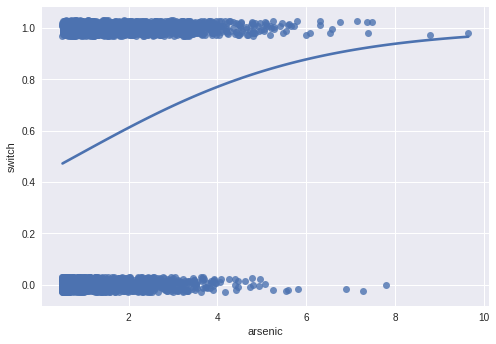

In [ ]:
# Plot arsenic and switch and add overlay with the logistic fit
sns.regplot(x = 'arsenic', y = 'switch', 
            y_jitter = 0.03,
            data = wells, 
            logistic = True,
            ci = None)

# Display the plot
plt.show()

## Round probabilities to binary. Confusion matrix manually

In [ ]:
# # Define the cutoff
# cutoff = 0.5

# # Compute class predictions: y_prediction
# y_prediction = np.where(prediction > cutoff, 1, 0)


# #------
# # Compute class predictions y_pred
# y_prediction = np.where(prediction > cutoff, 1, 0)

# # Assign actual class labels from the test sample to y_actual
# y_actual = wells_test['switch'].values

# # Compute and print confusion matrix using crosstab function
# conf_mat = pd.crosstab(y_actual, y_prediction, 
#                        rownames=['Actual'], 
#                        colnames=['Predicted'], 
#                        margins = True)
                      
# # Print the confusion matrix
# print(conf_mat)

## Poisson Regression 

Poisson distribution: `P(y) = ( (lambda ** y) * (e ** -lambda ) / y!`

- lambda - mean, variance
- lower bound - zero

Response variable: `y ~ Poisson(x)`

Mean of the response: `E(y) = lambda`

Regression Poisson model: `log(lambda) = beta_0 + beta_1 * x`

Response: `lambda = np.exp(beta_0 + beta_1 * x)`  which is the same as ` lambda = np.exp(beta_0) * np.exp(beta_1 * x)`


Getting Bets coeffs from model, we have to to np.exp() reversing.

`np.exp(beta_from_regression)`  means that `y` will change `exp(beta)` times larger / smaller than when x == 0

As it is np.exp(), 


*   if `b` == 0, x and y are not related as `np.exp(b) == 1`






### Poisson simple model

In [38]:
# create a model
model = glm(
    'sat ~ width', 
    data = crab, 
    family = sm.families.Poisson()
).fit()

print(model.summary(), '\n')

# Compute average crab width
mean_width = np.mean(crab['width'])

# Print the compute mean
print('Average width: ', round(mean_width, 3))

# Extract coefficients
intercept, slope = model.params

# Compute the estimated mean of y (lambda) at the average width
est_lambda = np.exp(intercept) * np.exp(slope * mean_width)

# Print estimated mean of y
print('Estimated mean of y at average width: ', round(est_lambda, 3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    sat   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -461.59
Date:                Fri, 24 Feb 2023   Deviance:                       567.88
Time:                        12:34:59   Pearson chi2:                     544.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3048      0.542     -6.095      0.0

### Overdispersion in Puasson distribution: Variance VS Mean

In [ ]:
# Compute and print sample mean of the number of satellites: sat_mean
sat_mean = np.mean(crab['sat'].mean())

print('Sample mean:', round(sat_mean, 3))

# Compute and print sample variance of the number of satellites: sat_var
sat_var = np.var(crab['sat'])
print('Sample variance:', round(sat_var, 3))

# Compute ratio of variance to mean
print('Ratio:', round(sat_var/sat_mean, 3))

Sample mean: 2.919
Sample variance: 9.855
Ratio: 3.376


Notice that given the mean parametar there should be 5.4% observations with zero count, but in the crab sample there are 35.8% observations with zero count, indicating the presence of overdispersion.

In [ ]:
import math
# Expected number of zero counts
exp_zero_cnt = ((sat_mean**0)*np.exp(-sat_mean))/math.factorial(0)

# Print exp_zero_counts
print('Expected zero counts given mean of ', round(sat_mean,3), 
      'is ', round(exp_zero_cnt,3)*100)

# Number of zero counts in sat variable
actual_zero_cnt = sum(crab['sat']  == 0)

# Number of observations in crab dataset
num_obs = len(crab)

# Print the percentage of zero count observations in the sample
print('Actual zero counts in the sample: ', round(actual_zero_cnt / num_obs,3) *100)

Expected zero counts given mean of  2.919 is  5.4
Actual zero counts in the sample:  35.8


There is overdispersion present since the ratio is greater than 1, meaning that the coefficient estimates should not be interpreted directly. 

In [ ]:
# Compute and print the overdispersion approximation
print(model.pearson_chi2 / model.df_resid)

3.182204743877352


## Negative Binomial Family as a replacer for Puasson in case of overdispersion

In [ ]:
# Define the formula for the model fit
formula = 'sat ~ width'

# Fit the GLM negative binomial model using log link function
crab_NB = smf.glm(formula = formula, data = crab, 
				  family = sm.families.NegativeBinomial()).fit()

# Print Poisson model's summary
print(model.summary())

# Print the negative binomial model's summary
print(crab_NB.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    sat   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -461.59
Date:                Fri, 24 Feb 2023   Deviance:                       567.88
Time:                        11:45:51   Pearson chi2:                     544.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3048      0.542     -6.095      0.0

Notice how standard error increased to 0.042, reflecting overdispersion which was not captured with the Poisson model.

In [ ]:
# Compute confidence intervals for crab_Pois model
print('Confidence intervals for the Poisson model')
print(model.conf_int())

# Compute confidence intervals for crab_NB model
print('Confidence intervals for the Negative Binomial model')
print(crab_NB.conf_int())

Confidence intervals for the Poisson model
                  0         1
Intercept -4.367531 -2.241983
width      0.124914  0.203176
Confidence intervals for the Negative Binomial model
                  0         1
Intercept -6.244509 -1.820000
width      0.108155  0.274472


Notice how the confidence intervals are wider for the negative Binomial model compared to quite narrow confidence intervals for the Poisson model since it did not account for overdispersion.

## PlottingPuasson Regression

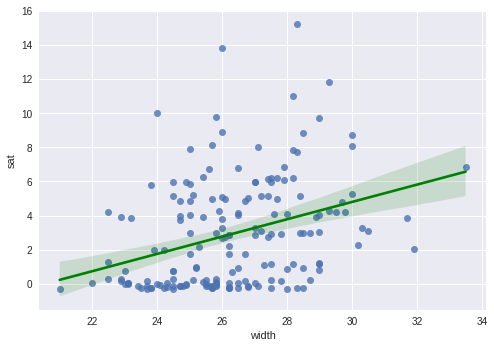

In [ ]:
# Import libraries
# import seaborn as sns
# import matplotlib.pyplot as plt

# Plot the data points and linear model fit
sns.regplot(x = 'width', y = 'sat', data = crab,
            y_jitter = 0.3,
            fit_reg = True,
            line_kws = {'color':'green', 
                        'label':'LM fit'})

# Print plot
plt.show()

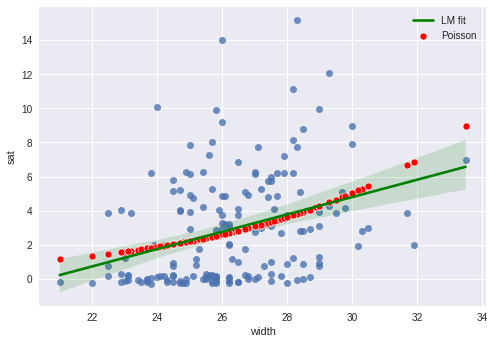

In [ ]:
crab['fit_values'] = model.fittedvalues

# Plot data points
sns.regplot('width', 'sat', data = crab,
            y_jitter = 0.3,
            fit_reg = True, 
            line_kws = {'color':'green', 
                        'label':'LM fit'})

# Poisson regression fitted values
sns.scatterplot('width', 'fit_values', data = crab,
           color = 'red', label = 'Poisson')

# Print plot          
plt.show()

## Multivariative Logistic Regression

### Multicollinearity - VIF factor

 rule of thumb threshold is VIF at the level of 2.5, meaning if the VIF is above 2.5 you should consider there is effect of multicollinearity on your fitted model.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Import statsmodels
# import statsmodels.api as sm
# from statsmodels.formula.api import glm

# Define model formula
formula = 'y ~ width + color'

# Fit GLM
model = glm(formula, data =crab, family = sm.families.Binomial()).fit()

# Print model summary
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      170
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -94.561
Date:                Fri, 24 Feb 2023   Deviance:                       189.12
Time:                        12:07:42   Pearson chi2:                     170.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.0708      2.807     -3.588      0.0

From model summary note that for each one-level increase in color of the female crab, the estimated odds multiply by exp(-0.509)=0.6, i.e. the odds for dark crabs are 60% than those for medium crabs.

In [ ]:

# Define model formula
formula = 'y ~ weight + width'

# Fit GLM
model = glm(formula, data = crab, 
    family = sm.families.Binomial()).fit()

# Print model summary
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      170
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96.446
Date:                Fri, 24 Feb 2023   Deviance:                       192.89
Time:                        12:10:11   Pearson chi2:                     167.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3547      3.528     -2.652      0.0

Notice that the neither weight nor width are statistically significant. Recall that when we fitted univariate logistic regressions for each variable, both variables where statistically significant. There is evident presence of multicollinearity

In [ ]:
# Import functions
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
X = crab[['weight', 'width', 'color']]
X['Intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns


vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
# print(vif['VIF'])

In [ ]:
print(vif)

   variables         VIF
0     weight    4.691018
1      width    4.726378
2      color    1.076594
3  Intercept  414.163343


With VIF well above 2.5 for weight and width means that there is multicollinearity present in the model and you can not use both variables in the model.

## Deviance in models

Deviance = -2 * Log-Likelihood

In [37]:
-2038 * -2

4076

In [39]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    sat   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -461.59
Date:                Fri, 24 Feb 2023   Deviance:                       567.88
Time:                        12:35:14   Pearson chi2:                     544.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3048      0.542     -6.095      0.0

In [40]:
model.null_deviance

632.7916592008108

In [41]:
model.deviance

567.8785724519456

In [43]:
model.llf

-461.588122206054

### Null deviance and model deviance

In [44]:
formula = 'switch ~ distance100 + arsenic'

# Fit GLM
model_dist_ars = glm(
    formula = formula, 
    data = wells    , 
    family = sm.families.Binomial()).fit()

# Compare deviance of null and residual model
diff_deviance = model_dist_ars.null_deviance - model_dist_ars.deviance

# Print the computed difference in deviance
print(diff_deviance)

188.76305963384857


Having both distance100 and arsenic in the model reduces deviance by 187 compared to the intercept only model

Adding distance100 to the null model reduces deviance by 41.9 and with an addition of arsenic the deviance further reduces by 145. Having such large reduction than expected reduction by 1 we can conclude that the multivariate model has improved the model fit.

linear transformations do not change the model error and hence the deviance remains the same. The reason being since linear transformation does not add new data information to the model.


If diff of deviances between models is more than 1, it means that new model is better in terms of quality.

## Model Matrix

Create a dataframe with intercept and vars (from formula) to put inside model

In [47]:
# Import function dmatrix()
from patsy import dmatrix

# Construct model matrix with arsenic and distance100
model_matrix = dmatrix('arsenic + distance100', data = wells, return_type = 'dataframe')
print(model_matrix.head())

   Intercept  arsenic  distance100
0        1.0     2.36      0.16826
1        1.0     0.71      0.47322
2        1.0     2.07      0.20967
3        1.0     1.15      0.21486
4        1.0     1.10      0.40874


### Log transformation , libs activating inside formula (np etc), 'center'

In [48]:
dmatrix('np.log(arsenic)', data = wells,
       return_type = 'dataframe').head()

,Intercept,np.log(arsenic)
0,1.0,0.858662
1,1.0,-0.342490
2,1.0,0.727549
3,1.0,0.139762
4,1.0,0.095310


In [49]:
print(dmatrix('C(color, Treatment(3))', 
     	  data = crab,
     	  return_type = 'dataframe').head())

   Intercept  C(color, Treatment(3))[T.1]  C(color, Treatment(3))[T.2]  \
0        1.0                          0.0                          1.0   
1        1.0                          0.0                          0.0   
2        1.0                          1.0                          0.0   
3        1.0                          0.0                          0.0   
4        1.0                          0.0                          0.0   

   C(color, Treatment(3))[T.4]  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0  


Notice the change in columns where now the medium dark category is the reference group, where its mean behavior is represented by the intercept.

In [50]:
# Construct model matrix
model_matrix = dmatrix('C(color, Treatment(4))' , data = crab, 
                       return_type = 'dataframe')

# Print first 5 rows of model matrix dataframe
print(model_matrix.head())

# Fit and print the results of a glm model with the above model matrix configuration
model = glm('y ~ C(color, Treatment(4))', data = crab, 
            family = sm.families.Binomial()).fit()

print(model.summary())

   Intercept  C(color, Treatment(4))[T.1]  C(color, Treatment(4))[T.2]  \
0        1.0                          0.0                          1.0   
1        1.0                          0.0                          0.0   
2        1.0                          1.0                          0.0   
3        1.0                          0.0                          0.0   
4        1.0                          0.0                          0.0   

   C(color, Treatment(4))[T.3]  
0                          0.0  
1                          1.0  
2                          0.0  
3                          1.0  
4                          1.0  
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      169
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   S

In [51]:
# Construct model matrix
model_matrix = dmatrix('C(color, Treatment(4)) + width' , data = crab, 
                       return_type = 'dataframe')

# Print first 5 rows of model matrix
print(model_matrix.head())

# Fit and print the results of a glm model with the above model matrix configuration
model = glm('y ~ C(color, Treatment(4)) + width', data = crab, 
            family = sm.families.Binomial()).fit()

print(model.summary())

   Intercept  C(color, Treatment(4))[T.1]  C(color, Treatment(4))[T.2]  \
0        1.0                          0.0                          1.0   
1        1.0                          0.0                          0.0   
2        1.0                          1.0                          0.0   
3        1.0                          0.0                          0.0   
4        1.0                          0.0                          0.0   

   C(color, Treatment(4))[T.3]  width  
0                          0.0   28.3  
1                          1.0   22.5  
2                          0.0   26.0  
3                          1.0   24.8  
4                          1.0   26.0  
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      168
Model Family:                Binomial   Df Model:                            4

In [52]:

# Fit GLM and print model summary
model_int = glm('switch ~ center(distance100) + center(arsenic) + center(distance100):center(arsenic)', 
                data = wells, family = sm.families.Binomial()).fit()

# View model results
print(model_int.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 switch   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     3006
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1956.2
Date:                Fri, 24 Feb 2023   Deviance:                       3912.4
Time:                        14:10:52   Pearson chi2:                 3.08e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [53]:
np.exp(-0.1789)

0.8361895141676441

In [54]:
np.exp(-0.8737)

0.4174042927051877

In [55]:
np.exp(0.4695)

1.5991943960866966